In [1]:
from model_complex import Calibration
import matplotlib.pyplot as plt


d = Calibration('total', 100)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
idata, data, simulation_func = d.calibrate('spb', './', '7-01-2018', '6-20-2019')

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


KeyboardInterrupt: 

In [8]:
from sklearn.metrics import r2_score
r2_score(list(data)[int(len(data)/2):], simulation_func(None, alpha, beta)[int(len(data)/2):])

0.801772825699964

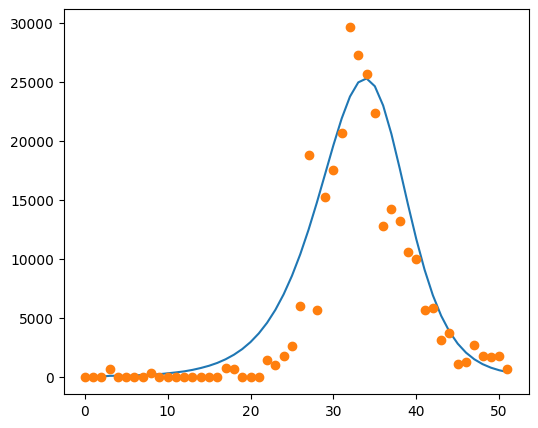

In [7]:

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
start_day = 15    
posterior = idata.posterior.stack(samples=("draw", "chain"))
alpha = posterior["a"].mean()
beta = posterior["b"].mean() 

ax.plot(simulation_func(None, alpha, beta))

ax.plot(list(data), "o")



In [3]:
from model_complex import FactoryBRModel

BRModel = FactoryBRModel.get_model('age-group')

Exception: model: ag-group does not exist

In [2]:
BRModel.simulate([1,1], [1,1])

TypeError: AgeGroupBRModel.simulate() missing 4 required positional arguments: 'alpha', 'beta', 'initial_infectious', and 'rho'

In [3]:
import numpy as np
import pymc as pm
from scipy.integrate import odeint

# Definition of parameters
a = 1.0
b = 0.1
c = 1.5
d = 0.75

# initial population of rabbits and foxes
X0 = [10.0, 5.0]
# size of data
size = 100
# time lapse
time = 15
t = np.linspace(0, time, size)


# Lotka - Volterra equation
def dX_dt(X, t, a, b, c, d):
    """Return the growth rate of fox and rabbit populations."""

    return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])


# simulator function
def competition_model(rng, a, b, c, gamma, size=None):
    return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))

# function for generating noisy data to be used as observed data.
def add_noise(a, b):
    noise = np.random.normal(size=(size, 2))
    simulated = competition_model(None, a, b, c, 0) + noise
    return simulated

# plotting observed data.
observed = add_noise(a, b)

with pm.Model() as model_lv:
    a = pm.HalfNormal("a", 1.0)
    b = pm.HalfNormal("b", 1.0)
    c = pm.HalfNormal("c", 1.0)
    gamma = pm.Uniform(name="gamma", lower=[0,0,0], upper=[1,1,1])
    sim = pm.Simulator("sim", competition_model, params=(a, b, c, gamma), epsilon=10, observed=observed)

    idata_lv = pm.sample_smc()

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1371097264822D+02   r2 =  0.7818262545238D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1371097264822D+02   r2 =  0.6149607860868D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1371097264822D+02   r2 =  0.4837094766724D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1371097264822D+02   r2 =  0.3804711830677D-15
 lsoda--  warning..internal t (=r1) 

/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1240077469508D+02   r2 =  0.8830673899366D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1240077469508D+02   r2 =  0.6945939882944D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1240077469508D+02   r2 =  0.5463465348997D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1240077469508D+02   r2 =  0.4297395906490D-15
 lsoda--  warning..internal t (=r1) 

/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))
/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))
/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1173903913302D+02   r2 =  0.7444569492456D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1173903913302D+02   r2 =  0.5855672255400D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1173903913302D+02   r2 =  0.4605893946911D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1173903913302D+02   r2 =  0.3622856287871D-15
 lsoda--  warning..internal t (=r1) 

/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1377902567088D+02   r2 =  0.6339624842696D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1377902567088D+02   r2 =  0.6339624842696D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1377902567088D+02   r2 =  0.6339624842696D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1377902567088D+02   r2 =  0.2821607924630D-15
 lsoda--  warning..internal t (=r1) 

/tmp/ipykernel_8409/1691848280.py:24: RuntimeWarning: overflow encountered in multiply
  return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])
/tmp/ipykernel_8409/1691848280.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])
/tmp/ipykernel_8409/1691848280.py:29: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  return odeint(dX_dt, y0=X0, t=t, rtol=0.01, args=(a, b, c, d))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7308256370371D+01   r2 =  0.2381549814119D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7308256370371D+01   r2 =  0.2381549814119D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7308256370371D+01   r2 =  0.2381549814119D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7308256370371D+01   r2 =  0.4239872229135D-15
 lsoda--  warning..internal t (=r1) 